In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from wordcloud import WordCloud, STOPWORDS

In [2]:
#Import the dataset and show the first 10 entries
df = pd.read_csv('European Restaurant Reviews.csv')
df.head(10)

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...
5,France,The Frog at Bercy Village,Negative,"Shocking management, TERRIBLE service by mum a...",Jul 2021 •,We visited this restaurant on Saturday night a...
6,France,The Frog at Bercy Village,Negative,We tired the tasting menu - avoid,Jan 2020 •,We tired the tasting menu with wine pairing. T...
7,France,The Frog at Bercy Village,Negative,Huge Disappointment,Oct 2019 •,This restaurant’s high rating is wholly unwarr...
8,France,The Frog at Bercy Village,Negative,Expensive mediocre food and service,Jun 2019 •,We got the Tasting Menu and wine pairing. Fran...
9,France,The Frog at Bercy Village,Negative,all around awful,May 2019 •,My wife and I booked well in advance based on ...


## Data Exploration

In [3]:
#Remove the dot at the end of the date
df['Review Date'] = df['Review Date'].str[:-1]

#Drop duplicate lines
df.drop_duplicates(inplace=True)

#Show the first 10 rows of the new dataframe
df.head(10)

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022,From the start this meal was bad- especially g...
5,France,The Frog at Bercy Village,Negative,"Shocking management, TERRIBLE service by mum a...",Jul 2021,We visited this restaurant on Saturday night a...
6,France,The Frog at Bercy Village,Negative,We tired the tasting menu - avoid,Jan 2020,We tired the tasting menu with wine pairing. T...
7,France,The Frog at Bercy Village,Negative,Huge Disappointment,Oct 2019,This restaurant’s high rating is wholly unwarr...
8,France,The Frog at Bercy Village,Negative,Expensive mediocre food and service,Jun 2019,We got the Tasting Menu and wine pairing. Fran...
9,France,The Frog at Bercy Village,Negative,all around awful,May 2019,My wife and I booked well in advance based on ...


In [4]:
#Rows in Dataframe
length = len(df)
print(length)

1453


In [5]:
#Print the unique countries and count the number 
unique_countries = df['Country'].unique()
print(unique_countries)
print(len(unique_countries))

['France' 'Italy' 'Poland' 'India' 'Russia' 'Morroco' 'Cuba']
7


In [6]:
#Print the number of unique restaurants and count the number 
unique_restaurants = df['Restaurant Name'].unique()
print(unique_restaurants)
print(len(unique_restaurants))

['The Frog at Bercy Village' 'Ad Hoc Ristorante (Piazza del Popolo)'
 'Stara Kamienica' 'Mosaic' 'Pelmenya' 'The LOFT'
 'Old Square (Plaza Vieja)']
7


In [7]:
#Count the number of postive and negative sentiments in the data set 
count_positive = df['Sentiment'].value_counts()
print(count_positive)

Positive    1237
Negative     216
Name: Sentiment, dtype: int64


In [8]:
#Add columns that keep track of the length of the reviews and review titles
df['Review Length'] = df['Review'].str.len() 
df['Review Title Length'] = df['Review Title'].str.len()
df.head(10)

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review,Review Length,Review Title Length
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024,The manager became agressive when I said the c...,146,12
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024,"I ordered a beef fillet ask to be done medium,...",281,20
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023,"This is an attractive venue with welcoming, al...",260,28
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023,Sadly I used the high TripAdvisor rating too ...,1513,40
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022,From the start this meal was bad- especially g...,1351,41
5,France,The Frog at Bercy Village,Negative,"Shocking management, TERRIBLE service by mum a...",Jul 2021,We visited this restaurant on Saturday night a...,1848,78
6,France,The Frog at Bercy Village,Negative,We tired the tasting menu - avoid,Jan 2020,We tired the tasting menu with wine pairing. T...,175,33
7,France,The Frog at Bercy Village,Negative,Huge Disappointment,Oct 2019,This restaurant’s high rating is wholly unwarr...,645,19
8,France,The Frog at Bercy Village,Negative,Expensive mediocre food and service,Jun 2019,We got the Tasting Menu and wine pairing. Fran...,245,35
9,France,The Frog at Bercy Village,Negative,all around awful,May 2019,My wife and I booked well in advance based on ...,1185,16


## Data Visualizations

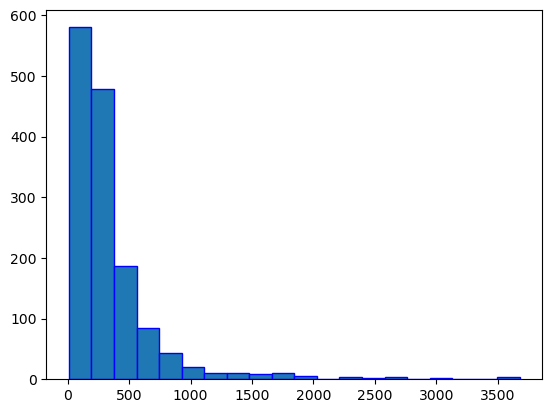

In [9]:
#The distribution of the number of reviews by length of the review
num_bins = 20
bin_edges = np.linspace(df['Review Length'].min(), df['Review Length'].max(), num_bins + 1)
plt.hist(df['Review Length'], bins = bin_edges, edgecolor='blue')
plt.show()

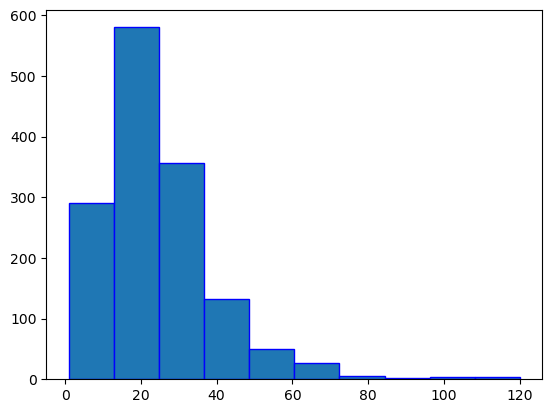

In [10]:
#The distribution of the number of reviews by length of the review title
num_bins = 10
bin_edges_title = np.linspace(df['Review Title Length'].min(), df['Review Title Length'].max(), num_bins + 1)
plt.hist(df['Review Title Length'], bins = bin_edges_title, edgecolor='blue')
plt.show()

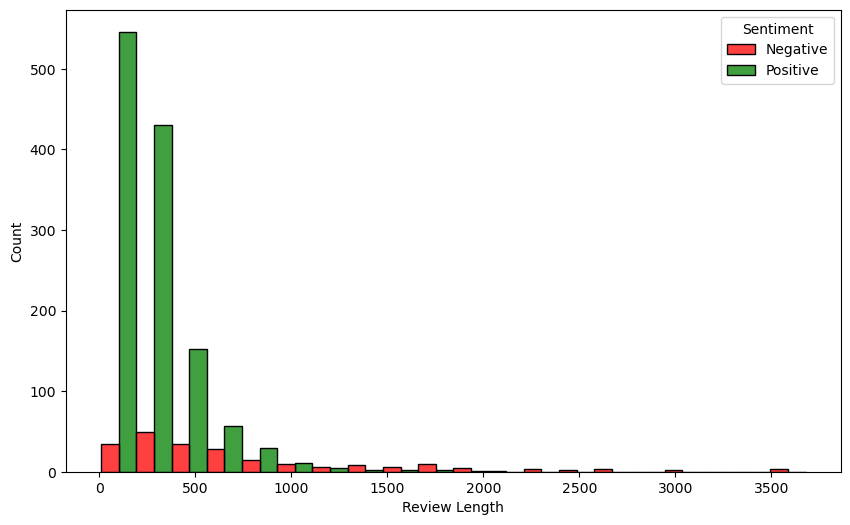

In [11]:
#Plot the length of the reviews binned the same as the previous histogram. The count of positive and negative sentiment
#is displayed for each bin
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Review Length', hue = 'Sentiment', bins = bin_edges, multiple = 'dodge', palette={'Positive':'green', 'Negative': 'red'})
plt.show()

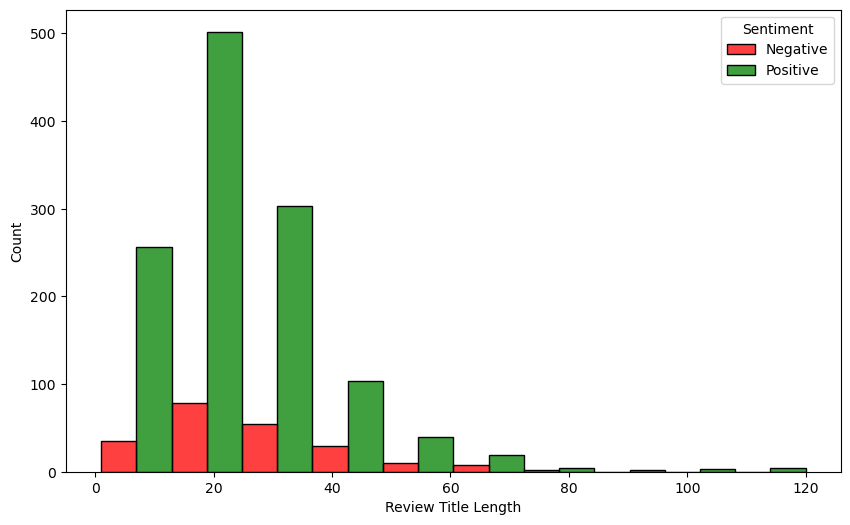

In [12]:
#Plot the length of the review's title binned the same as the previous title lengthhistogram. The count of positive and
#negative sentiment is displayed for each bin
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Review Title Length', hue = 'Sentiment', bins = bin_edges_title, multiple = 'dodge', palette={'Positive':'green', 'Negative': 'red'})
plt.show()

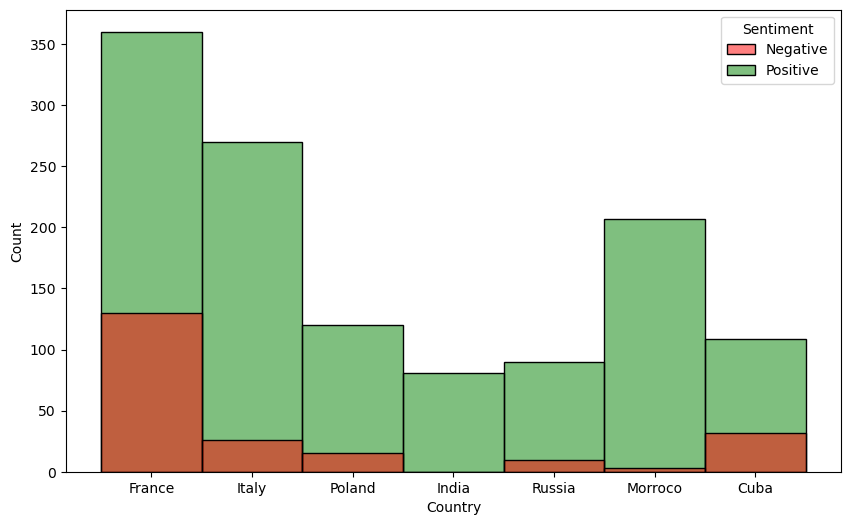

In [13]:
#Shows the count of reviews for each country as well as the count of positive and negative sentiment reviews from those 
#countries
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Country', hue = 'Sentiment', palette={'Positive':'green', 'Negative':'red'})
plt.show()

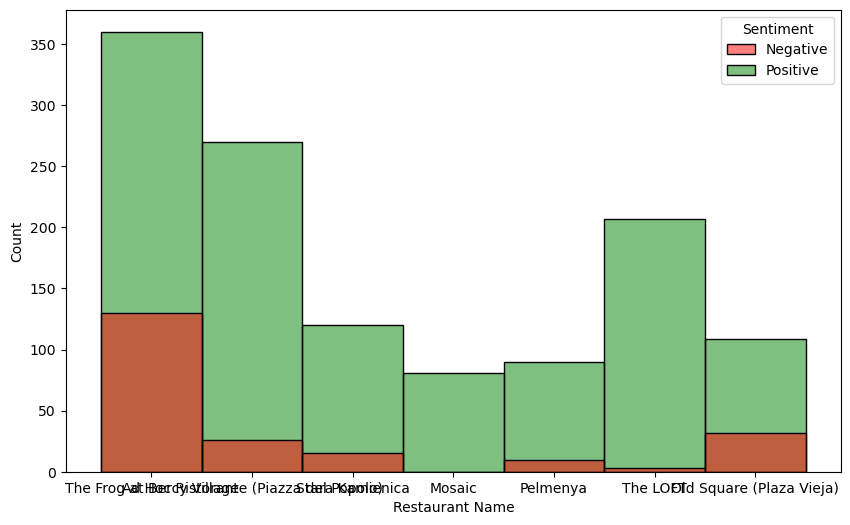

In [14]:
#Shows the count of reviews for each restaurant as well as the count of positive and negative sentiment reviews from
#those restaurants
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Restaurant Name', hue = 'Sentiment', palette={'Positive':'green', 'Negative':'red'})
plt.show()

In [15]:
#Seperate the postive and negative reviews into two dataframes
positive_reviews = df[df['Sentiment'] == 'Positive']
negative_reviews = df[df['Sentiment'] == 'Negative']

#Combine the postive and negative reviews into their own individual strings
positive_string = ' '.join(positive_reviews['Review'])
negative_string = ' '.join(negative_reviews['Review'])


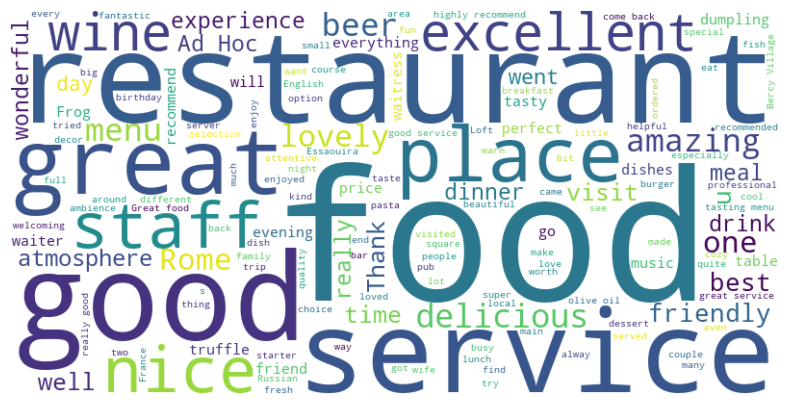

In [16]:
#Generate the positive wordcloud
positive_wordcloud = WordCloud(width = 800, height=400, background_color='white', max_words = 150, stopwords=set(STOPWORDS)).generate(positive_string)

#Display the wordcloud
plt.figure(figsize=(10,5)) 
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

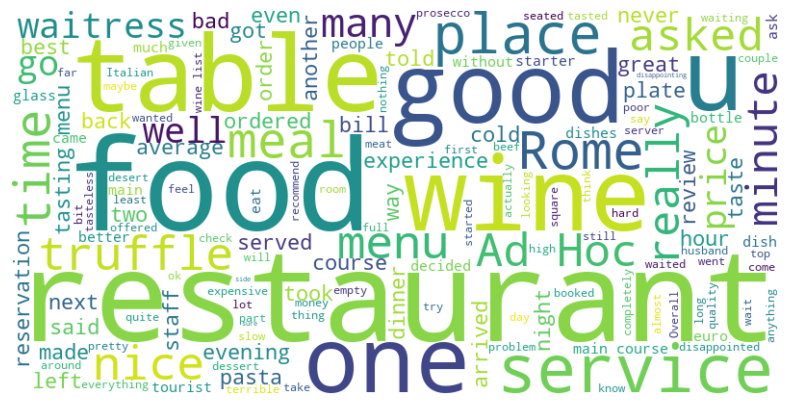

In [17]:
#Generate the negative wordcloud
negative_wordcloud = WordCloud(width = 800, height=400, background_color='white', max_words = 150, stopwords=set(STOPWORDS)).generate(negative_string)

#Display the wordcloud
plt.figure(figsize=(10,5)) 
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Split the Data 

In [18]:
#Label encode Sentiment
le = LabelEncoder()

df['Sentiment'] = le.fit_transform(df['Sentiment'])

In [19]:
#Split the data into testing and training sets
#Seperate the Sentiment column from the rest of the data
X = df['Review']
y = df['Sentiment']

#Set the training and testing function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=20)


## Preprocess Data

In [20]:
#Remove punctuation in the reviews 
def remove_punctuation(text): 
    no_punctuation = ''.join([i for i in text if i not in string.punctuation])
    return no_punctuation

X_train[0:] = X_train[0:].apply(lambda x:remove_punctuation(x))
X_train.head(10)

1131    Delicious and chill vibe Try the Khinkalis Geo...
202     All Good  Preeyansh was creazy  the place and ...
858     Delicious meal served very quickly staff speak...
565     If you want to really enjoy in food and servic...
508     The place is nice in terms of decor and the pr...
914     Great food great service Amazing restaurant in...
427     Great beer and food plus watched American Foot...
227     ABBIE was our waitress and was so nice to have...
1136    So delicious Got the dumplings with pumpkin an...
907     I have been traveling all around of world eati...
Name: Review, dtype: object

In [21]:
#Make all of the reviews lower case
X_train[0:] = X_train[0:].apply(lambda x: x.lower())

X_train.head(10)

1131    delicious and chill vibe try the khinkalis geo...
202     all good  preeyansh was creazy  the place and ...
858     delicious meal served very quickly staff speak...
565     if you want to really enjoy in food and servic...
508     the place is nice in terms of decor and the pr...
914     great food great service amazing restaurant in...
427     great beer and food plus watched american foot...
227     abbie was our waitress and was so nice to have...
1136    so delicious got the dumplings with pumpkin an...
907     i have been traveling all around of world eati...
Name: Review, dtype: object

In [22]:
#Function to perform tokenization
def tokenization(text): 
    tokens = re.split('\W+', text)
    return tokens

X_train[0:] = X_train[0:].apply(lambda x: tokenization(x)) 
X_train.head(10)

1131    [delicious, and, chill, vibe, try, the, khinka...
202     [all, good, preeyansh, was, creazy, the, place...
858     [delicious, meal, served, very, quickly, staff...
565     [if, you, want, to, really, enjoy, in, food, a...
508     [the, place, is, nice, in, terms, of, decor, a...
914     [great, food, great, service, amazing, restaur...
427     [great, beer, and, food, plus, watched, americ...
227     [abbie, was, our, waitress, and, was, so, nice...
1136    [so, delicious, got, the, dumplings, with, pum...
907     [i, have, been, traveling, all, around, of, wo...
Name: Review, dtype: object

In [23]:
#Removal of stop words
#download stopwords from the nltk dictionary
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text): 
    output = [i for i in text if i not in stopwords]
    return output
X_train[0:] = X_train[0:].apply(lambda x:remove_stopwords(x))
X_train.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\escra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1131    [delicious, chill, vibe, try, khinkalis, georg...
202     [good, preeyansh, creazy, place, dish, absolut...
858     [delicious, meal, served, quickly, staff, spea...
565     [want, really, enjoy, food, service, highly, r...
508     [place, nice, terms, decor, professional, cord...
914     [great, food, great, service, amazing, restaur...
427     [great, beer, food, plus, watched, american, f...
227     [abbie, waitress, nice, helpful, bilingual, se...
1136    [delicious, got, dumplings, pumpkin, lamb, che...
907     [traveling, around, world, eating, lot, good, ...
Name: Review, dtype: object

In [24]:
#Change the list in X_train to a string so that it can be handeled by the tf-idf vectorizer 
def list_to_string(list): 
    return ' '.join(list)

X_train[0:] = X_train[0:].apply(list_to_string)
X_train.head(10)

1131    delicious chill vibe try khinkalis georgian so...
202     good preeyansh creazy place dish absolutny fin...
858     delicious meal served quickly staff speaks eng...
565     want really enjoy food service highly reccomen...
508     place nice terms decor professional cordial we...
914     great food great service amazing restaurant wa...
427     great beer food plus watched american football...
227     abbie waitress nice helpful bilingual server f...
1136    delicious got dumplings pumpkin lamb cheesecur...
907     traveling around world eating lot good stuff d...
Name: Review, dtype: object

## TF-IDF Implementation

In [25]:
vectorizer = TfidfVectorizer()

tfidf_matrix_train = vectorizer.fit_transform(X_train)

tfidf_matrix_test = vectorizer.transform(X_test)

In [26]:
feature_names = vectorizer.get_feature_names_out()
tfidf_matrix_train_dense = tfidf_matrix_train.todense()
tfidf_matrix_test_dense = tfidf_matrix_test.todense()

In [27]:
print(feature_names)
print(tfidf_matrix_train_dense)
print(tfidf_matrix_test_dense)
print(tfidf_matrix_train_dense.shape)
print(tfidf_matrix_train.shape)
print(tfidf_matrix_test.shape)

['0100' '0815' '0830' ... 'zucchini' 'zurek' 'été']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1017, 5251)
(1017, 5251)
(436, 5251)


# Train Naive Bayes Model

### Description: 
The Naive Bayes model is a supervised machine learning algorithim that is used commonly for text classification. Unlike logistic regression, it does not learn which features distinguish between classes. Therefore it assumes that each feature is independent. The pros of using this algorithm include simplicity, speed, and effectiveness of handling high dimensional data. The prediction model that will ultimately be used must be able to handle high dimensional data because the tf-idf matrix has many dimensions. The biggest con is the assumption of independence which is rarely the case with real world data. Therefore, the only feature tested in this model is the tf-idf matrix that is derived from the Review column in the dataset. 

### Justification:
The Naive Bayes model was selected to test the classification of this data because it is a good starting point because of the ease of use. The results from the Naive Bayes implementation will help determine if a more complex model is necessary. There are ways to make the algorithm more complex which may improve prediction, but the initial model will only contain simplistic assumptions. 

In [28]:
#Intialize and fit the Naive Bayes Model
nb = MultinomialNB()
nb.fit(tfidf_matrix_train, y_train)

#Predict the values from the Native Bayes Model
y_pred = nb.predict(tfidf_matrix_test)

In [29]:
#Print the accuracy score, confusion matrix, and classification report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8532110091743119
[[  1  64]
 [  0 371]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        65
           1       0.85      1.00      0.92       371

    accuracy                           0.85       436
   macro avg       0.93      0.51      0.48       436
weighted avg       0.87      0.85      0.79       436



### Conclusion: 
The accuracy derived from this model was actually quite good. Unfortunately, this does not tell the story as the accuracy is largely the result of the imbalanced class. The Naive Bayes algorithm only predicted one review to be negative and all the others to be of positive sentiment. The recall and f-1 score for the zero class tell more of the story. They have the values of 0.02 and 0.03 respectively which is very poor. In conclusion, the Naive Bayes algorithm is unable to predict reviews that have negative sentiment labeled all the reviews, save for one, as positive. 

## Train Support Vector Machine (SVM) Model

### Description: 
A support vector machine (SVM) are supervised learning models used for classification, regression, and outlier detection. They find the optimal hyperplane that best seperates different classes in the feature space. SVMs have advantages such as effectiveness in high dimensional spaces and still effective when number of dimensions is greater than the number of samples. Another major advantage of SVMs is their robustness in avoiding overfitting which will help create an effective model. The disadvantages is that the choice of kernel and hyperparameters require intensive tuning.

### Justification:
The SVM is a good choice for this data because of the dimensionality of the tf-idf matrices. The model is built using the Radial Basis Function (RBF) kernel because it can properly handle non-linear relationships. Another reason to utilize the RBF kernel is its ability to handle data with high dimensionality which is present in this scenario. The parameters for the RBF kernel will be chosen by running functions from the sklearn package that can provide ideal parameters. The optimal parameters to use are C = 1000 and gamma = .01.

In [30]:
#Define the range of values to optimize for gamma and C
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
kernel = ['rbf']

#set up the parameter grid
param_grid = dict(gamma = gamma_range, C=C_range, kernel=kernel)

#initialize the model
svm = SVC()

#intialize the function that will provide the best C and gamma
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(tfidf_matrix_train, y_train)

#provides the optimal C and gamma values to use from the previous ranges
print(grid_search.best_params_)


Fitting 5 folds for each of 169 candidates, totalling 845 fits
{'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}


In [31]:
#Initialize and train model with parameters specified
svm_model = SVC(kernel='rbf', gamma=0.01, C=1000.0)
svm_model.fit(tfidf_matrix_train, y_train)

#Predict the sentiment values
y_pred_svm = svm_model.predict(tfidf_matrix_test)

In [32]:
#Print the accuracy score, confusion matrix, and classification report
print(accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

0.944954128440367
[[ 44  21]
 [  3 368]]
              precision    recall  f1-score   support

           0       0.94      0.68      0.79        65
           1       0.95      0.99      0.97       371

    accuracy                           0.94       436
   macro avg       0.94      0.83      0.88       436
weighted avg       0.94      0.94      0.94       436



### Conclusion:
The SVM model performed much more effectively than the Naive Bayes. SVM was able to predict 44 of the negative sentiment reviews correctly. This lead to a recall of 0.68. Another impressive aspect of this model was that it only predicted 3 reviews as having negative sentiment when they actually had positive sentiment. Therefore the model predicted 368 out of 371 positive reviews correctly. Therefore, if this model says that a review has a positive sentiment, that means it likely contains positive sentiment. The SVM model clearly outperforms the Naive Bayes model in many aspects.